In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf

In [5]:
from tensorflow import keras 

In [6]:
keras.__version__

'2.10.0'

In [7]:
tf.__version__

'2.10.0'

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

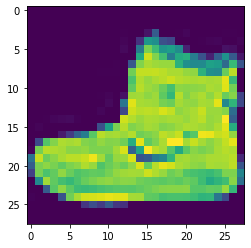

In [14]:
#to view the data use plt.imshow
plt.imshow(X_train_full[0])

In [10]:
y_train_full[1]

0

In [11]:
class_names = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [12]:
class_names[y_train_full[10]]

'T-shirt'

In [13]:
X_train_full[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0, 164,  50,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   1,   0,   0,   5,   0,  45, 217, 255, 176,   0,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3,
          3,   5,   9,   0,   2,   0,  62, 236, 231, 215,  27,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  29, 244, 231, 234,  74,   0,   1,   0,
          0,   0],
       [  

# NORMALIZING OUR DATA

In [15]:
# i then normalize the data dimensions so that they are of approximately the same scale.  
divide all pixel intensity by 255

In [21]:
X_train_n = X_train_full/255.0
X_test_n = X_test / 255.0

In [20]:
X_test_n[6]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.06666667, 0.        , 0.1372549 , 0.21568627,
        0.20392157, 0.17647059, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.00392157,
        0.98039216, 1.        , 0.96078431, 0.99607843, 0.93333333,
        0.95686275, 0.9372549 , 0.54117647, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.34509804,
        0.48627451, 0.66666667, 0.99607843, 0.54117647, 0.73333333,
        1.        , 0.7333

# SPLIT THE DATA INTO TRAIN/VALIDATION/TEST DATASETS

In [26]:
#in the earlier step of importing date, i had 60,000 datasets for training and 10,000 test datasets. I further split the data into train/validation. validation data is used for tuning the hyperparameters and evaluate the models, IT IS used to optimized the performance of our models.

In [23]:
X_valid, X_train = X_train_n[:5000],X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [25]:
X_test[3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.08235294,
        0.48235294, 0.42352941, 0.38823529, 0.38823529, 0.32941176,
        0.3254902 , 0.3372549 , 0.36078431, 0.2745098 , 0.02352941,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.41568627,
        0.97254902, 0.90196078, 0.80392157, 0.9372549 , 0.83137255,
        0.68235294, 0.84313725, 0.81176471, 0.54509804, 0.36470588,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.49803922,
        0.84705882, 0.83529412, 0.80392157, 0.83921569, 0.83921569,
        0.75686275, 0.8980

In [30]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# CREATE ANN USING KNN

In [33]:
np.random.seed(42)
tf.random.set_seed(42)

In [38]:
#first create a model
#flatten is used because we want to convert the 2d image to 1d
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


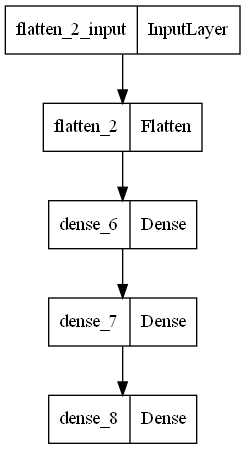

In [41]:
#to look at the neural network
import pydot
keras.utils.plot_model(model)

In [47]:
#we can access the information on weight and biases
weights, biases = model.layers[1].get_weights()

In [48]:
weights

array([[-0.06318335,  0.06427416, -0.01333392, ...,  0.02099492,
        -0.0191748 ,  0.0432506 ],
       [ 0.04066117,  0.01571059,  0.06438872, ...,  0.07346778,
        -0.03878252,  0.03664666],
       [ 0.05389808, -0.05692989,  0.0257813 , ...,  0.05204493,
        -0.02295406, -0.03724655],
       ...,
       [ 0.01948473,  0.02320559,  0.02791842, ...,  0.04295115,
         0.0715258 ,  0.04855895],
       [-0.05995618,  0.02797073,  0.05568026, ..., -0.0539132 ,
         0.01802883, -0.05966367],
       [ 0.02284403, -0.06624383, -0.05173946, ...,  0.02740186,
         0.02798107, -0.01138853]], dtype=float32)

In [49]:
weights.shape

(784, 300)

In [50]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [51]:
biases.shape

(300,)

# COMPILE AND TRAIN MODEL

In [52]:
#https://keras.io/api/models/sequential/

In [54]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "sgd", metrics =["accuracy"])

In [55]:
model_history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7230 - accuracy: 0.7649 - val_loss: 0.5180 - val_accuracy: 0.8246
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4854 - accuracy: 0.8289 - val_loss: 0.4338 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4392 - accuracy: 0.8447 - val_loss: 0.5566 - val_accuracy: 0.7956
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4129 - accuracy: 0.8559 - val_loss: 0.3920 - val_accuracy: 0.8682
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3945 - accuracy: 0.8615 - val_loss: 0.3747 - val_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3762 - accuracy: 0.8668 - val_loss: 0.3735 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3643 - accuracy: 0.8712 - val_loss: 0.3652 - val_accuracy:

In [56]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [57]:
model_history.history

{'loss': [0.7230185270309448,
  0.4853513538837433,
  0.4391552805900574,
  0.4128629267215729,
  0.39450857043266296,
  0.37619978189468384,
  0.3642691671848297,
  0.3530643880367279,
  0.34246185421943665,
  0.3330588638782501,
  0.32447531819343567,
  0.3152296841144562,
  0.3080987334251404,
  0.30164244771003723,
  0.29434359073638916,
  0.2893541753292084,
  0.28369995951652527,
  0.2772137522697449,
  0.27277565002441406,
  0.26712438464164734,
  0.26226821541786194,
  0.25743281841278076,
  0.25328320264816284,
  0.2486732453107834,
  0.2447185516357422,
  0.24022994935512543,
  0.2368054836988449,
  0.2333090901374817,
  0.22830340266227722,
  0.22508512437343597],
 'accuracy': [0.7649454474449158,
  0.8289090991020203,
  0.8446545600891113,
  0.8558545708656311,
  0.8615272641181946,
  0.8668181896209717,
  0.8711636066436768,
  0.8752909302711487,
  0.8800181746482849,
  0.8820545673370361,
  0.8849454522132874,
  0.8870182037353516,
  0.8904545307159424,
  0.89200001955032

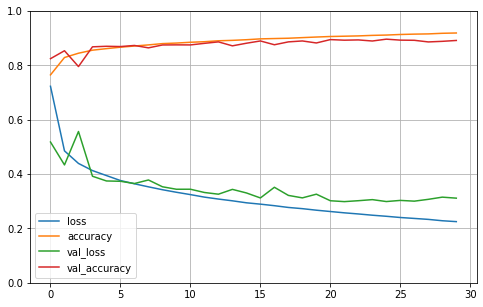

In [59]:
#to plot how our accuracy are changing with each epoch

pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [60]:
#with each epoch, the training accuracy and the validation accuracy is increasing and the loss is decreasing 
#the model as not converge yet tho
#so it needs more epoch. 

# To evaluate Performance

In [61]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3411 - accuracy: 0.8790


[0.3410642743110657, 0.8790000081062317]

In [62]:
#the first is loss and the second is accuracy(0.879).

# PREDICT PROBABLITIES AND PREDICT CLASS OF NEW UNSEEN DATA

In [63]:
X_new = X_test[:3]

In [65]:
#to predict probablity score attached to each class
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 22ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

AxesImage(54,36;334.8x217.44)


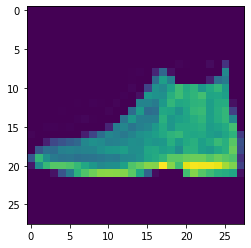

In [68]:
#to plot the image of the datasets
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


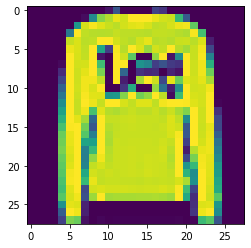

In [70]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


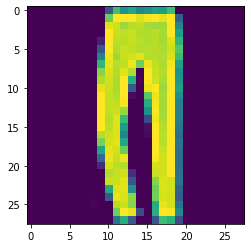

In [71]:
print(plt.imshow(X_test[2]))